In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from datetime import datetime
import warnings
import re

# Configuration de l'affichage
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Chargement du dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Création d'une copie du DataFrame pour tester des transformations avancées
# Cette approche permet de préserver le DataFrame original tout en expérimentant
df_test = df.copy()
df_test['date_added'] = pd.to_datetime(df_test['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')

## Question 4
Affichez un aperçu du DataFrame en affichant ses 5 premières
observations et ses 5 dernières observations à l’aide de deux fonctions
spécifiques de Pandas.


In [2]:
# Afficher les 5 premières lignes du DataFrame
print("5 premières observations :")
print(df.head())  # Fonction pour les 5 premières lignes

# Afficher les 5 dernières lignes du DataFrame
print("\n5 dernières observations :")
print(df.tail())  # Fonction pour les 5 dernières lignes



5 premières observations :
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2 

## Question 5
Affichez les informations du DataFrame, notamment le type d'index et
les colonnes, les valeurs non nulles et l'utilisation de la mémoire.

In [3]:
# Afficher les informations du DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Question 6
Affichez la dimensionnalité du DataFrame. Combien avez-vous de variables ? Combien avez-vous d'observations ?

In [4]:
# Afficher la dimensionnalité du DataFrame
print("Dimensions du DataFrame :", df.shape)

print(f"Nombre de variables : {df.shape[1]}")
print(f"Nombre d'observations : {df.shape[0]}")

Dimensions du DataFrame : (8807, 12)
Nombre de variables : 12
Nombre d'observations : 8807


**Réponse à la question 6:**
- Le DataFrame contient **12 variables** 
- Le DataFrame contient **environ 8807 observations** 

## Question 7
Affichez les colonnes du DataFrame.

In [5]:
# Afficher les colonnes du DataFrame
print("\nColonnes du DataFrame :")

print(df.columns.tolist())


Colonnes du DataFrame :
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


## Question 8 
Affichez le type des différentes colonnes du DataFrame. Avez-vous des
données quantitatives (numériques) ? Avez-vous des données
qualitatives (catégorielles) ? Si oui, lesquelles ?

In [6]:
# Afficher le type des différentes colonnes
print("Types des colonnes du DataFrame :")
print(df.dtypes)

# Identifier les données quantitatives (numériques)
print("\nDonnées quantitatives (numériques) :")
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_columns)

# Identifier les données qualitatives (catégorielles)
print("\nDonnées qualitatives (catégorielles) :")
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

Types des colonnes du DataFrame :
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Données quantitatives (numériques) :
['release_year']

Données qualitatives (catégorielles) :
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


**Réponse à la question 8 :**

Après analyse des types de colonnes, nous pouvons observer que le dataset contient deux types de données :

- **Données quantitatives (numériques)** : 
  - `release_year` : l'année de sortie du contenu (int64)

- **Données qualitatives (catégorielles)** :
  - `show_id` : identifiant unique de chaque contenu
  - `type` : type de contenu (Film ou Série TV)
  - `title` : titre du contenu
  - `director` : réalisateur(s)
  - `cast` : acteurs principaux
  - `country` : pays d'origine
  - `date_added` : date d'ajout au catalogue
  - `rating` : classification par âge
  - `duration` : durée (en minutes pour les films, en saisons pour les séries)
  - `listed_in` : catégories/genres
  - `description` : synopsis

La majorité des colonnes sont de type qualitatif (object), ce qui est typique pour un catalogue de contenus médias où les données textuelles (titres, descriptions, catégories) prédominent. Seule la colonne `release_year` est de type numérique (int64).

## Question 9 :
Y a-t-il des données manquantes ? Identifiez la proportion en
pourcentage.

In [7]:
# Vérifier les données manquantes
missing_data = df.isnull().sum()
missing_data_percent = 100 * df.isnull().sum() / len(df)
missing_data_table = pd.concat([missing_data, missing_data_percent], axis=1)
missing_data_table.columns = ['Valeurs manquantes', 'Pourcentage (%)']
print("Résumé des données manquantes :")
missing_data_table.sort_values('Pourcentage (%)', ascending=False)

Résumé des données manquantes :


,Valeurs manquantes,Pourcentage (%)
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


## Question 10 :
A l’aide de la librairie Missingno. Affichez un graphique représentatif de
la proportion des données manquantes.

<Figure size 1200x600 with 0 Axes>

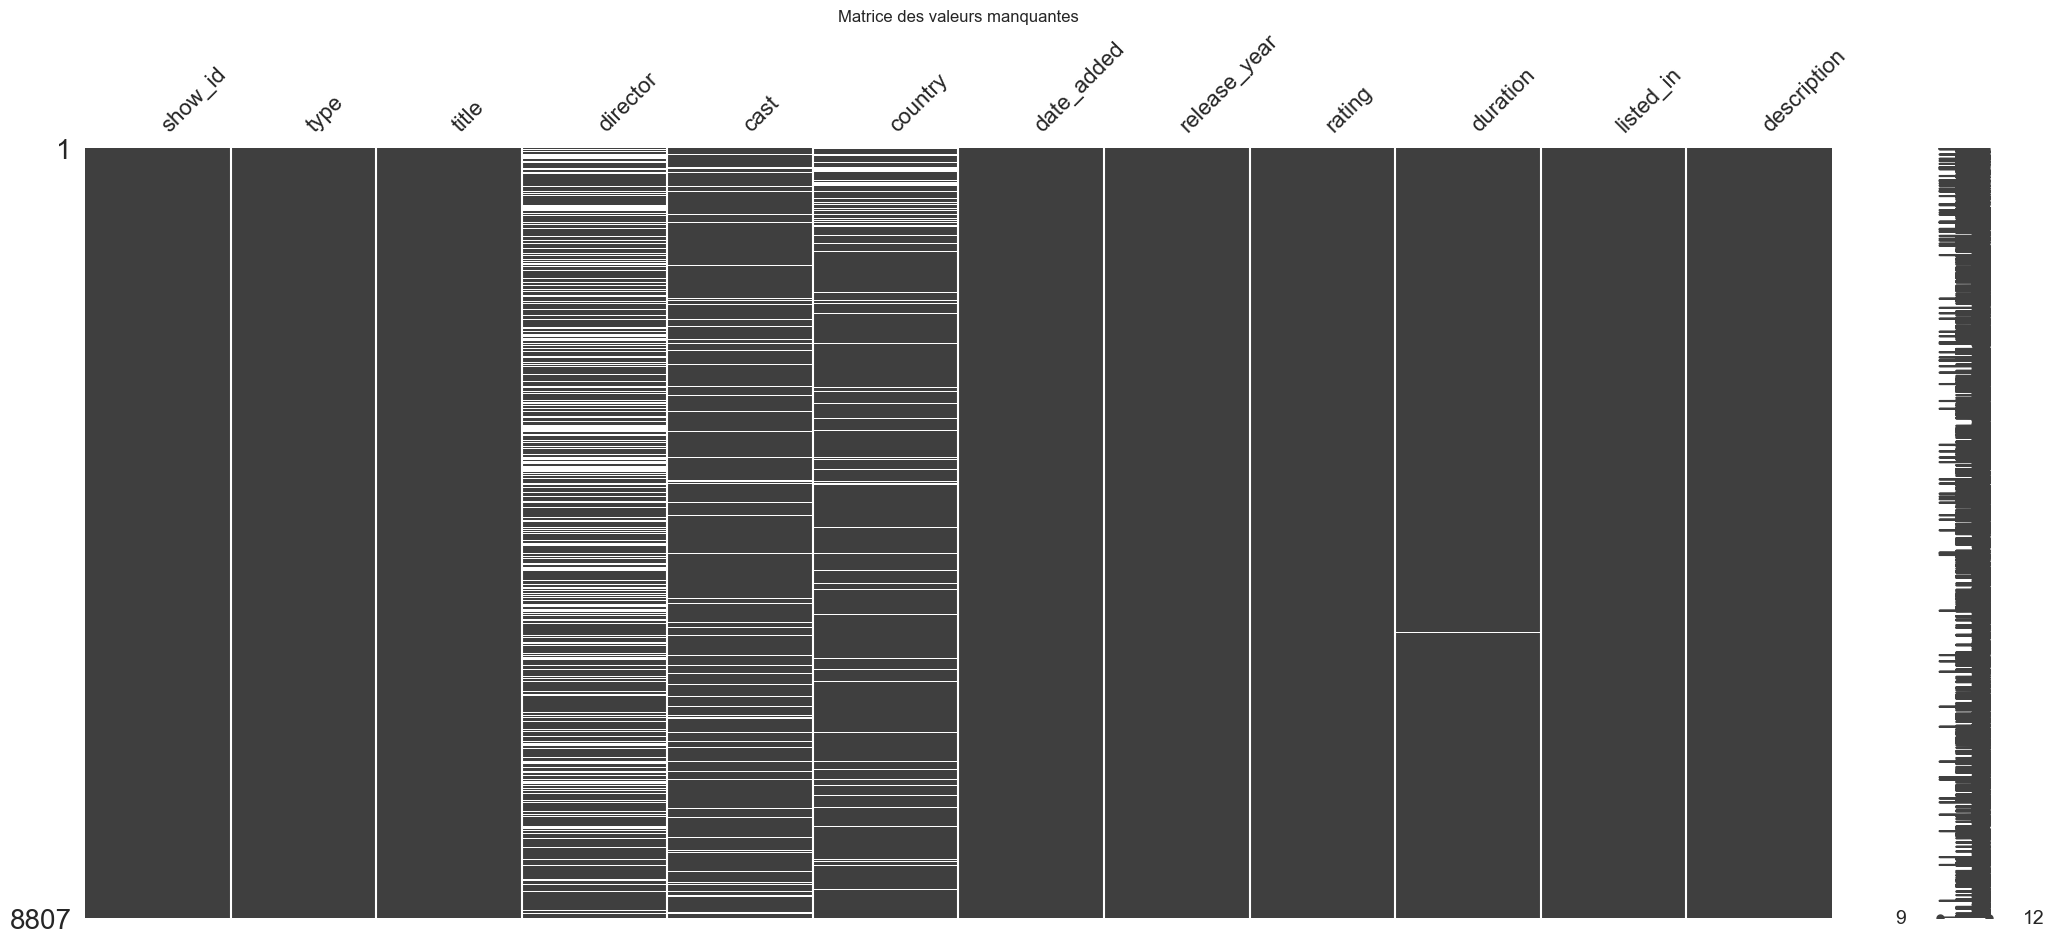

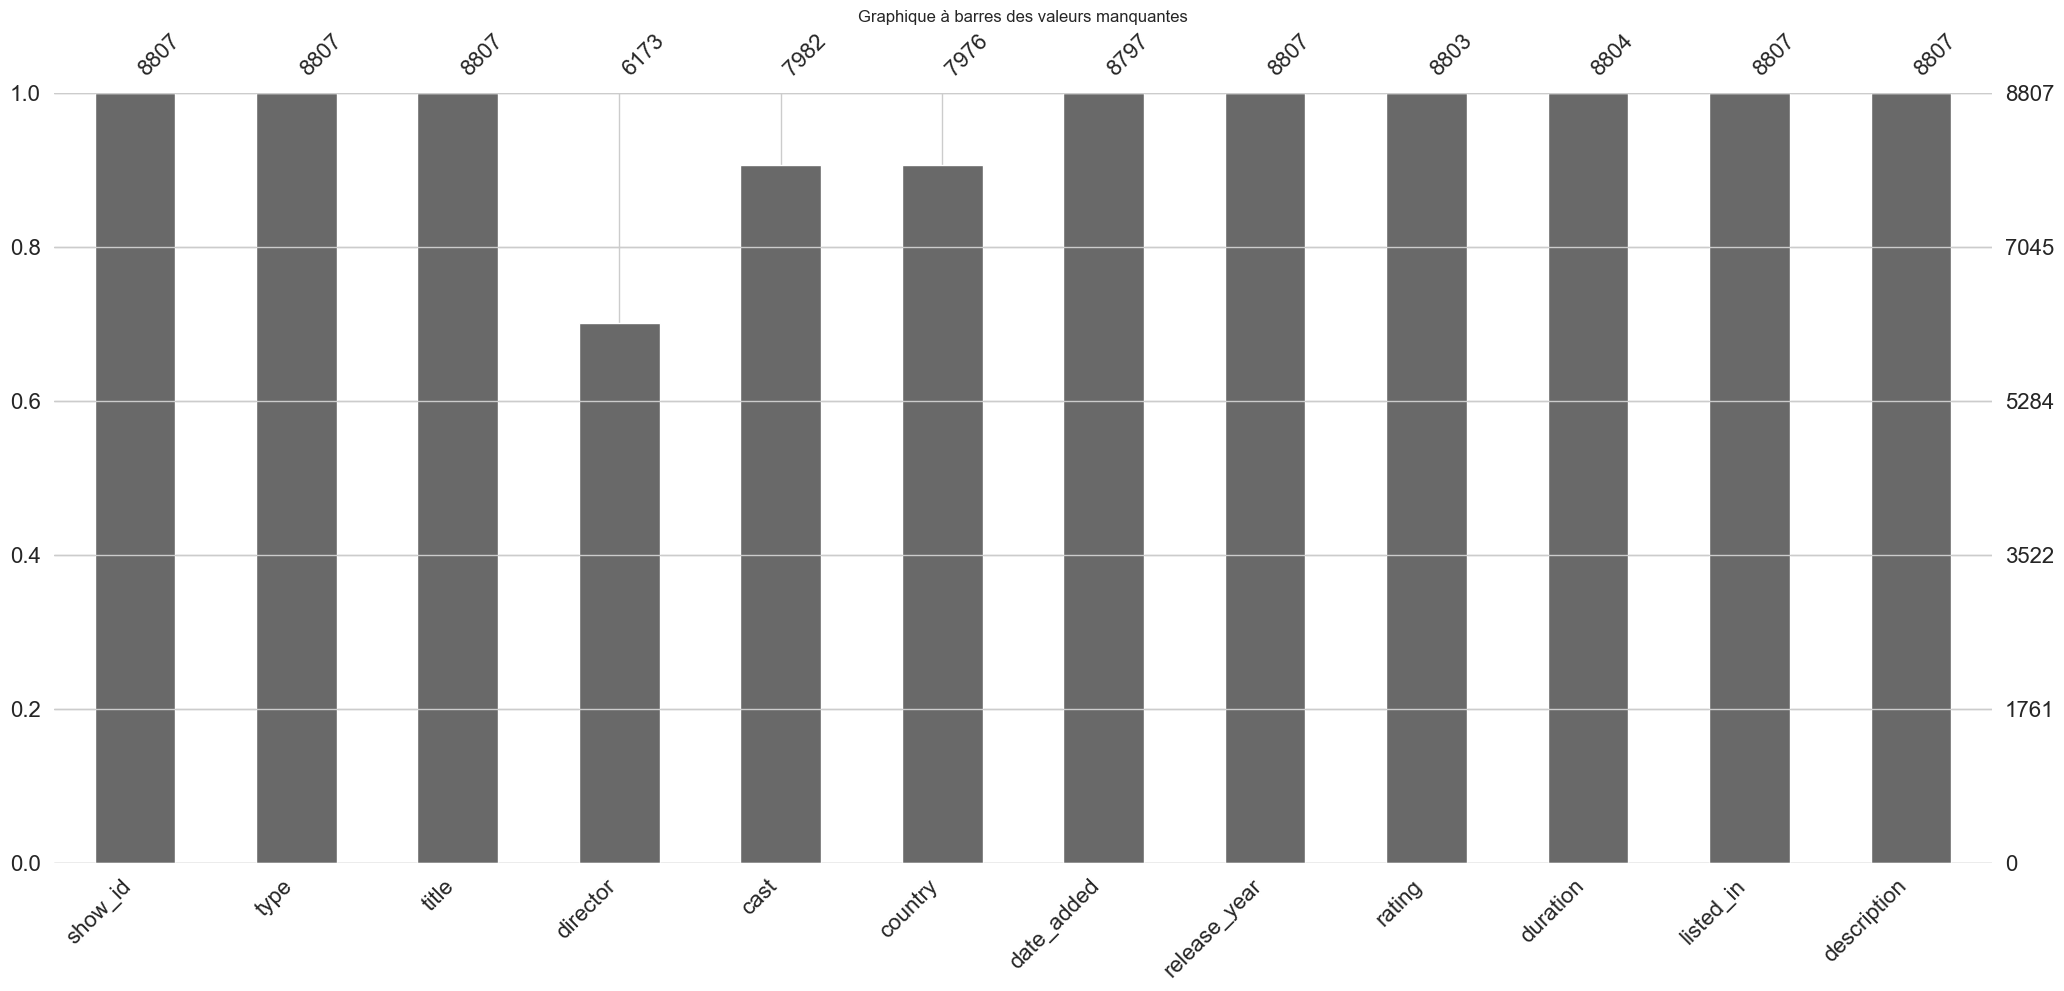

In [8]:
# Matrice des valeurs manquantes
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Matrice des valeurs manquantes')
plt.show()

# Graphique à barres des valeurs manquantes
plt.figure(figsize=(12, 6))
msno.bar(df)
plt.title('Graphique à barres des valeurs manquantes')
plt.show()

## Question 11 :
Affichez une observation aléatoire du DataFrame.

In [9]:
# Afficher une observation aléatoire
random_index = np.random.randint(0, len(df))
print(f"\nObservation aléatoire (index {random_index}) :")
print(df.iloc[random_index])


Observation aléatoire (index 4504) :
show_id                                                     s4505
type                                                      TV Show
title                                                        Rake
director                                                      NaN
cast            Richard Roxburgh, Matt Day, Adrienne Pickering...
country                                                 Australia
date_added                                       October 16, 2018
release_year                                                 2018
rating                                                      TV-MA
duration                                                5 Seasons
listed_in       Crime TV Shows, International TV Shows, TV Com...
description     While Cleaver Greene is a brilliant and driven...
Name: 4504, dtype: object


## Question 12 :
Affichez toutes les informations de l'œuvre “Catch Me If You Can”.

In [10]:
# Afficher toutes les informations de l'œuvre "Catch Me If You Can"
print("\nInformations sur 'Catch Me If You Can' :")
catch_me = df[df['title'] == 'Catch Me If You Can']
print(catch_me)


Informations sur 'Catch Me If You Can' :
    show_id   type                title          director  \
329    s330  Movie  Catch Me If You Can  Steven Spielberg   

                                                  cast                country  \
329  Leonardo DiCaprio, Tom Hanks, Christopher Walk...  United States, Canada   

         date_added  release_year rating duration listed_in  \
329  August 1, 2021          2002  PG-13  142 min    Dramas   

                                           description  
329  An FBI agent makes it his mission to put cunni...  


## Question 13 :
Affichez le nom du film le plus récent du dataset.


In [11]:
# Convertir la colonne date_added en datetime pour les prochaines analyses
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')
# Trouver le film le plus récent
films = df[df['type'] == 'Movie'].copy()
film_recent = films.loc[films['date_added'].idxmax()]
print(f"\nFilm le plus récent : {film_recent['title']} (ajouté le {film_recent['date_added'].strftime('%d/%m/%Y')})")


Film le plus récent : Dick Johnson Is Dead (ajouté le 25/09/2021)


## Question 14 :
Affichez le nom de la série la plus récente du dataset.

In [12]:
# Trouver la série la plus récente
series = df[df['type'] == 'TV Show'].copy()
serie_recente = series.loc[series['date_added'].idxmax()]
print(f"\nSérie la plus récente : {serie_recente['title']} (ajoutée le {serie_recente['date_added'].strftime('%d/%m/%Y')})")


Série la plus récente : Blood & Water (ajoutée le 24/09/2021)


## Question 15 :

Modifiez la variable date_added de telle sorte qu’elle soit de type
DateTime.

In [21]:
# Vérifions d'abord le type actuel
print("Type actuel de la colonne date_added:", df['date_added'].dtype)

# Explication académique
print("Note: La conversion de date_added en format datetime a déjà été effectuée")
print("précédemment pour permettre l'analyse temporelle des questions 13-14.")

# Montrer un exemple de dates au format français
print("\nExemples de dates au format français:")
for date in df['date_added'].head(3):
    if pd.notna(date):  # Vérifier que la date n'est pas NaT
        print(date.strftime('%d/%m/%Y'))  # Format jour/mois/année
    else:
        print("Date manquante")

Type actuel de la colonne date_added: datetime64[ns]
Note: La conversion de date_added en format datetime a déjà été effectuée
précédemment pour permettre l'analyse temporelle des questions 13-14.

Exemples de dates au format français:
25/09/2021
24/09/2021
24/09/2021


## Question 16 :

Modifiez la variable duration de telle sorte que la durée des films soit un
nombre plutôt qu’une chaîne de caractères, par exemple : 160 au lieu
de “160 min”.


In [24]:


# Vérifier d'abord quelques exemples de la colonne duration
print("Exemples de durées avant conversion:")
print(df[df['type'] == 'Movie']['duration'].head())

# Extraction avec méthode alternative
df.loc[df['type'] == 'Movie', 'duration_value'] = df.loc[df['type'] == 'Movie', 'duration'].str.extract('(\d+)').astype(float)

# Si ça ne fonctionne pas, essayez cette approche plus directe
if df[df['type'] == 'Movie']['duration_value'].isna().all():
    print("Approche alternative utilisée")
    # Fonction pour extraire les nombres d'une chaîne
    def extract_minutes(duration_str):
        if pd.isna(duration_str):
            return float('nan')
        import re
        numbers = re.findall(r'\d+', str(duration_str))
        if numbers:
            return float(numbers[0])
        return float('nan')
    
    # Appliquer la fonction à chaque valeur
    df.loc[df['type'] == 'Movie', 'duration_value'] = df.loc[df['type'] == 'Movie', 'duration'].apply(extract_minutes)

# Vérifier à nouveau
print("\nExemples après conversion:")
print(df[df['type'] == 'Movie'][['title', 'duration', 'duration_value']].head())

Exemples de durées avant conversion:
0      90 min
6      91 min
7     125 min
9     104 min
12    127 min
Name: duration, dtype: object
Approche alternative utilisée

Exemples après conversion:
                               title duration  duration_value
0               Dick Johnson Is Dead   90 min            90.0
6   My Little Pony: A New Generation   91 min            91.0
7                            Sankofa  125 min           125.0
9                       The Starling  104 min           104.0
12                      Je Suis Karl  127 min           127.0


## Question 17 :

Modifiez la variable duration de telle sorte que la durée des séries soit
un nombre plutôt qu’une chaîne de caractères, par exemple : 2 au
milieu de “2 seasons”.

In [25]:
# Vérifier d'abord quelques exemples de la colonne duration pour les séries
print("Exemples de durées de séries avant conversion:")
print(df[df['type'] == 'TV Show']['duration'].head())

# Extraction du nombre de saisons pour les séries TV
# Utilisons directement la méthode qui a fonctionné pour les films
def extract_seasons(duration_str):
    if pd.isna(duration_str):
        return float('nan')
    import re
    numbers = re.findall(r'\d+', str(duration_str))
    if numbers:
        return float(numbers[0])
    return float('nan')

# Appliquer la fonction aux séries TV uniquement
df.loc[df['type'] == 'TV Show', 'duration_value'] = df.loc[df['type'] == 'TV Show', 'duration'].apply(extract_seasons)

# Vérifier le résultat
print("\nExemples après conversion:")
print(df[df['type'] == 'TV Show'][['title', 'duration', 'duration_value']].head())

Exemples de durées de séries avant conversion:
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
5     1 Season
Name: duration, dtype: object

Exemples après conversion:
                   title   duration  duration_value
1          Blood & Water  2 Seasons             2.0
2              Ganglands   1 Season             1.0
3  Jailbirds New Orleans   1 Season             1.0
4           Kota Factory  2 Seasons             2.0
5          Midnight Mass   1 Season             1.0


## Question 18 :

Modifiez la variable listed_in de telle sorte que la chaîne de caractères
soit un liste de chaîne de caractères, par exemple : [“International TV
Shows”, “TV Dramas”, “TV Mysteries”] au lieu de “International TV
Shows, TV Dramas, TV Mysteries”.

In [26]:
# Vérifier d'abord le format actuel
print("Format actuel de la colonne listed_in:")
print(df['listed_in'].head())

# Transformer la chaîne de caractères en liste
df['listed_in_list'] = df['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')] if isinstance(x, str) else [])

# Vérifier le résultat
print("\nFormat après transformation:")
for i, (original, transformed) in enumerate(zip(df['listed_in'].head(), df['listed_in_list'].head())):
    print(f"Exemple {i+1}:")
    print(f"  Original: {original}")
    print(f"  Transformé: {transformed}")

Format actuel de la colonne listed_in:
0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

Format après transformation:
Exemple 1:
  Original: Documentaries
  Transformé: ['Documentaries']
Exemple 2:
  Original: International TV Shows, TV Dramas, TV Mysteries
  Transformé: ['International TV Shows', 'TV Dramas', 'TV Mysteries']
Exemple 3:
  Original: Crime TV Shows, International TV Shows, TV Action & Adventure
  Transformé: ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure']
Exemple 4:
  Original: Docuseries, Reality TV
  Transformé: ['Docuseries', 'Reality TV']
Exemple 5:
  Original: International TV Shows, Romantic TV Shows, TV Comedies
  Transformé: ['International TV Shows', 'Romantic TV Shows', 'TV Comedies']


## Question 19 :

Affichez les valeurs uniques des variables : type, country,
release_year, rating et listed_in.



In [33]:
# Afficher les valeurs uniques de 'type'
print("Valeurs uniques de 'type':")
print(df['type'].unique())
print(f"Nombre de valeurs uniques: {df['type'].nunique()}")
print()

# Afficher les valeurs uniques de 'country'
print("Valeurs uniques de 'country':")
# Comme il peut y avoir beaucoup de pays, affichons juste un aperçu
unique_countries = df['country'].dropna().unique()
print(f"Nombre de pays uniques: {len(unique_countries)}")
print("Aperçu des 15 premiers pays:")
print(unique_countries[:15])
print()

# Afficher les valeurs uniques de 'release_year'
print("Valeurs uniques de 'release_year':")
unique_years = sorted(df['release_year'].unique())
print(f"Nombre d'années de sortie uniques: {len(unique_years)}")
print(f"Plage d'années: de {min(unique_years)} à {max(unique_years)}")
print(unique_years)
print()

# Afficher les valeurs uniques de 'rating'
print("Valeurs uniques de 'rating':")
print(df['rating'].unique())
print(f"Nombre de ratings uniques: {df['rating'].nunique()}")
print()

# Afficher les valeurs uniques de 'listed_in'
print("Valeurs uniques de 'listed_in':")
# Utilisons la colonne listed_in_list que nous avons créée à la question 18
unique_genres = set()
for genres_list in df['listed_in_list']:
    for genre in genres_list:
        unique_genres.add(genre)
print(f"Nombre de genres uniques: {len(unique_genres)}")
print("Liste des genres uniques:")
print(sorted(list(unique_genres)))

Valeurs uniques de 'type':
['Movie' 'TV Show']
Nombre de valeurs uniques: 2

Valeurs uniques de 'country':
Nombre de pays uniques: 748
Aperçu des 15 premiers pays:
['United States' 'South Africa' 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan']

Valeurs uniques de 'release_year':
Nombre d'années de sortie uniques: 74
Plage d'années: de 1925 à 2021
[np.int64(1925), np.int64(1942), np.int64(1943), np.int64(1944), np.int64(1945), np.int64(1946), np.int64(1947), np.int64(1954), np.int64(1955), np.int64(1956), np.int64(1958), np.int64(1959), np.int64(1960), np.int64(1961), np.int64(1962), np.int64(1963), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1973

## Question 20 :

Voyez-vous un “director” ayant produit plus d’une œuvre ?

In [34]:
# Compter les occurrences de chaque réalisateur
director_counts = df['director'].dropna().value_counts()

# Filtrer pour ne garder que ceux avec plus d'une œuvre
directors_multiple_works = director_counts[director_counts > 1]

# Afficher le résultat
if len(directors_multiple_works) > 0:
    print(f"Oui, {len(directors_multiple_works)} réalisateurs ont produit plus d'une œuvre.")
    print("\nTop 10 des réalisateurs les plus prolifiques :")
    print(directors_multiple_works.head(10))
else:
    print("Non, aucun réalisateur n'a produit plus d'une œuvre.")

Oui, 867 réalisateurs ont produit plus d'une œuvre.

Top 10 des réalisateurs les plus prolifiques :
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


## Question 21 :

Quelle est l’année avec le plus de films ajoutés au catalogue de Netflix ?

L'année avec le plus de films ajoutés au catalogue Netflix est 2019 avec 1424 films.

Distribution des films ajoutés par année:
year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
Name: count, dtype: int64


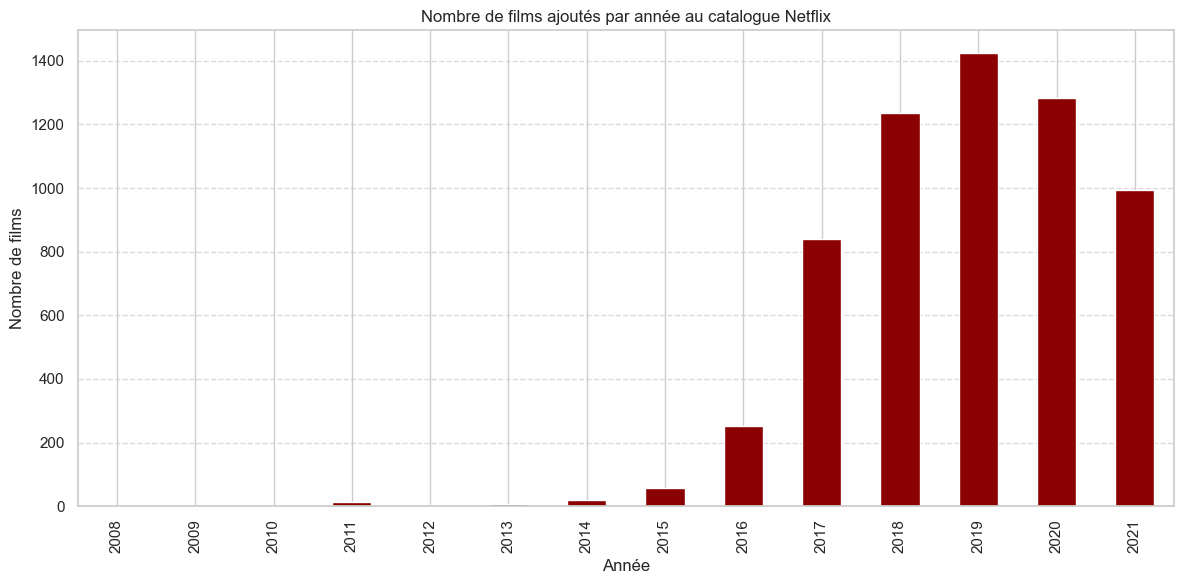

In [36]:
# Extraire l'année d'ajout à partir de la colonne date_added pour les films uniquement
films = df[df['type'] == 'Movie'].copy()
films['year_added'] = films['date_added'].dt.year

# Compter le nombre de films ajoutés par année
films_par_annee = films['year_added'].value_counts().sort_index()

# Trouver l'année avec le plus de films ajoutés
annee_max = films_par_annee.idxmax()
nb_films_max = films_par_annee.max()

# Afficher le résultat
print(f"L'année avec le plus de films ajoutés au catalogue Netflix est {annee_max} avec {nb_films_max} films.")

# Afficher la distribution par année pour avoir une vue d'ensemble
print("\nDistribution des films ajoutés par année:")
print(films_par_annee)

# Visualisation
plt.figure(figsize=(12, 6))
films_par_annee.plot(kind='bar', color='darkred')
plt.title('Nombre de films ajoutés par année au catalogue Netflix')
plt.xlabel('Année')
plt.ylabel('Nombre de films')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Question 22 :

Quelle est l’année avec le plus de séries ajoutées au catalogue de
Netflix ?

In [38]:
# Extraire l'année d'ajout à partir de la colonne date_added pour les séries uniquement
series = df[df['type'] == 'TV Show'].copy()
# Convertir explicitement en integer pour éviter les décimales
series['year_added'] = series['date_added'].dt.year.astype('Int64')  # Int64 avec majuscule gère les valeurs NaN

# Compter le nombre de séries ajoutées par année
series_par_annee = series['year_added'].value_counts().sort_index()

# Trouver l'année avec le plus de séries ajoutées
annee_max_series = series_par_annee.idxmax()
nb_series_max = series_par_annee.max()

# Afficher le résultat
print(f"L'année avec le plus de séries ajoutées au catalogue Netflix est {annee_max_series} avec {nb_series_max} séries.")

# Afficher la distribution par année pour avoir une vue d'ensemble
print("\nDistribution des séries ajoutées par année:")
print(series_par_annee)

L'année avec le plus de séries ajoutées au catalogue Netflix est 2020 avec 595 séries.

Distribution des séries ajoutées par année:
year_added
2008      1
2013      5
2014      5
2015     26
2016    176
2017    349
2018    412
2019    592
2020    595
2021    505
Name: count, dtype: Int64


## Question 23 :

Visualisez vos données à l’aide des différentes librairies de Matplotlib,
Seaborn ou Plotly :

**a. La répartition du type d'oeuvres du dataset**

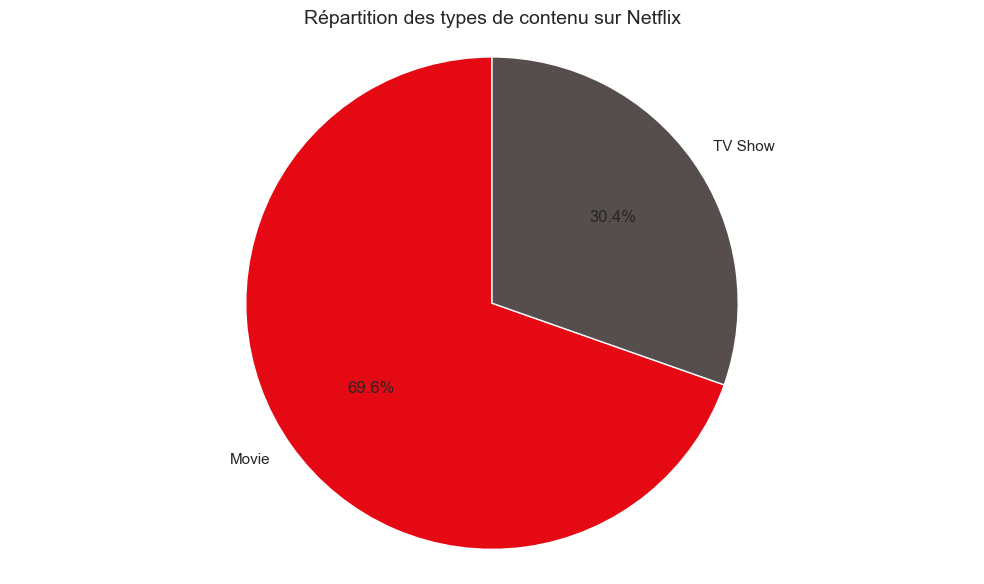

In [49]:
# a. La répartition du type d'œuvres du dataset (avec Matplotlib)
plt.figure(figsize=(10, 6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['#E50914', '#564D4D'])  # Couleurs Netflix
plt.title('Répartition des types de contenu sur Netflix', fontsize=14)
plt.axis('equal')  # Pour que le camembert soit circulaire
plt.tight_layout()
plt.show()

# Version alternative avec Plotly (interactive)
fig = px.pie(values=type_counts.values, names=type_counts.index, 
             title='Répartition des types de contenu sur Netflix',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

b. La répartition des oeuvres en fonction des pays du dataset

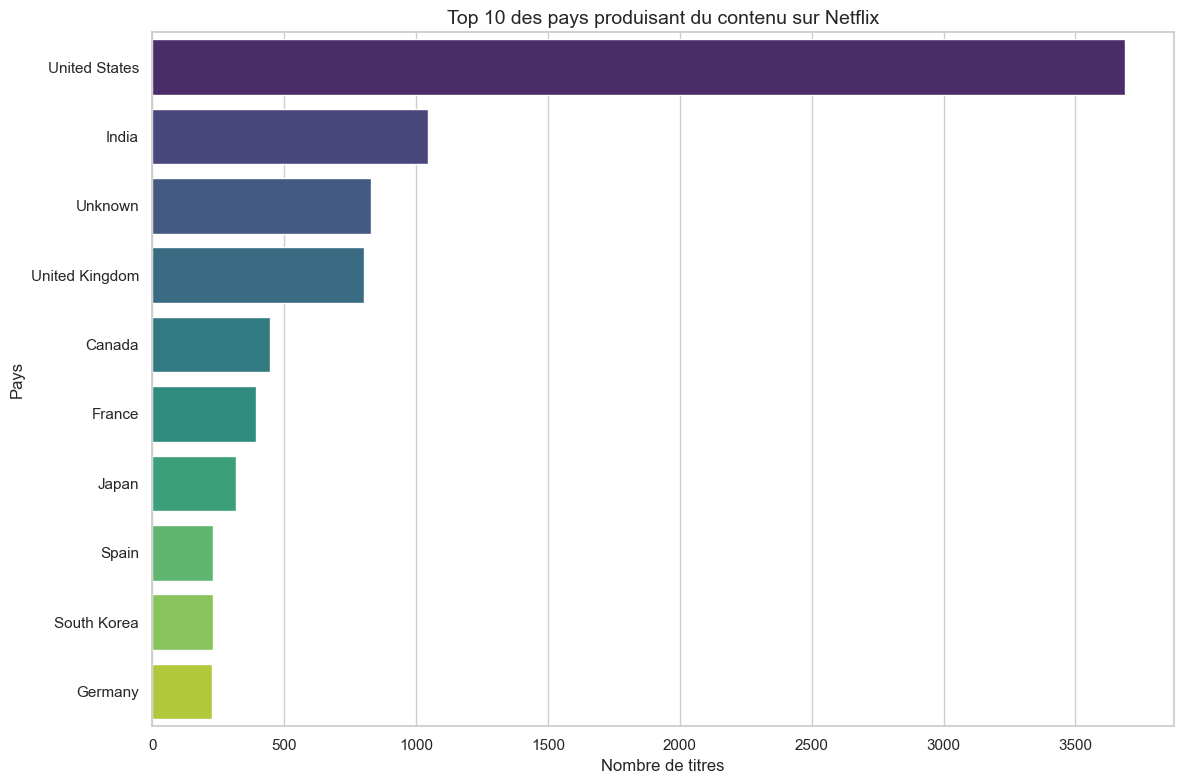

In [50]:
# b. La répartition des œuvres en fonction des pays (avec Seaborn)
# Nettoyer les données des pays (certains contenus ont plusieurs pays)
df['country_clean'] = df['country'].fillna('Unknown')
countries = df['country_clean'].str.split(', ').explode().str.strip()
top_countries = countries.value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 des pays produisant du contenu sur Netflix', fontsize=14)
plt.xlabel('Nombre de titres')
plt.ylabel('Pays')
plt.tight_layout()
plt.show()

c. La répartition des années du dataset

In [51]:
# c. La répartition des années du dataset (avec Plotly)
# Histogramme des années de sortie
fig = px.histogram(df, x='release_year', nbins=30, 
                   title='Distribution des années de sortie',
                   labels={'release_year': 'Année de sortie', 'count': 'Nombre de titres'},
                   color_discrete_sequence=['#E50914'])  # Couleur Netflix
fig.update_layout(bargap=0.1)
fig.show()

# Distribution des années d'ajout au catalogue
df['year_added'] = df['date_added'].dt.year.astype('Int64')  # Conversion en entier
year_added_counts = df['year_added'].value_counts().sort_index()

fig = px.bar(x=year_added_counts.index, y=year_added_counts.values,
            title='Évolution des ajouts au catalogue Netflix par année',
            labels={'x': 'Année d\'ajout', 'y': 'Nombre de titres'},
            color_discrete_sequence=['#564D4D'])
fig.show()

d. La répartition des ratings du dataset


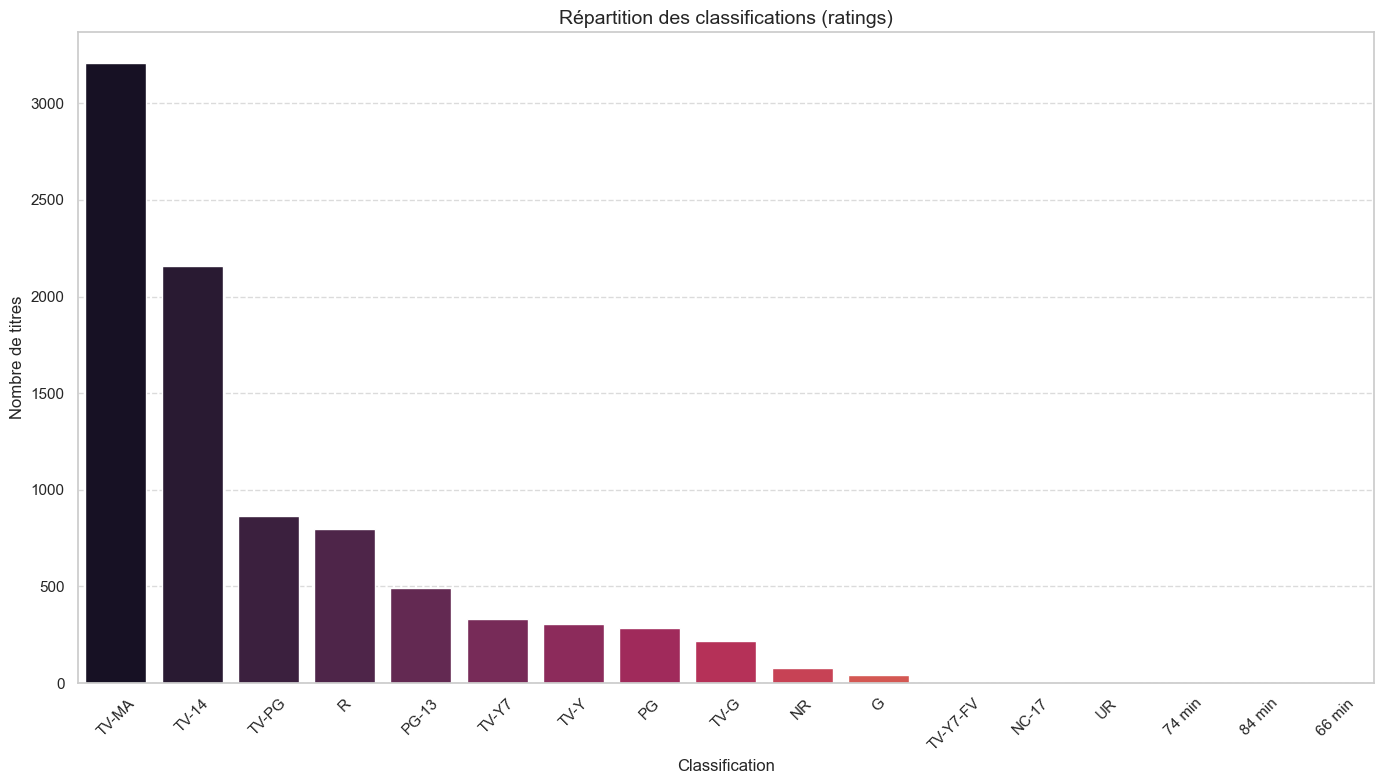

In [52]:
# d. La répartition des ratings du dataset (avec Seaborn)
plt.figure(figsize=(14, 8))
rating_counts = df['rating'].value_counts()
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='rocket')
plt.title('Répartition des classifications (ratings)', fontsize=14)
plt.xlabel('Classification')
plt.ylabel('Nombre de titres')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

e. La répartition de la durée des films du dataset

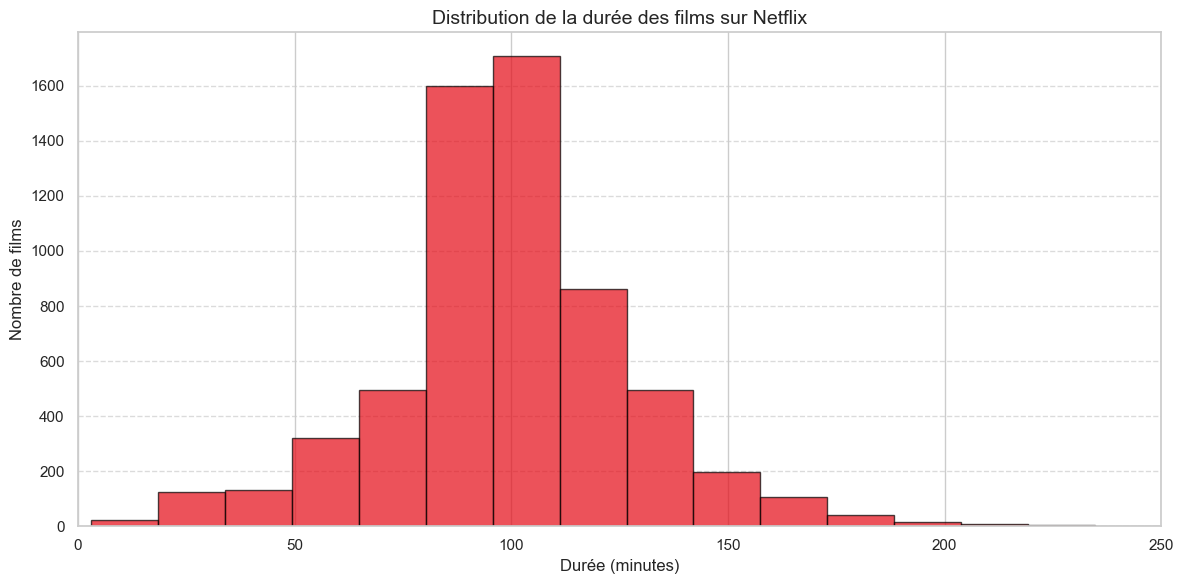

In [53]:
# e. La répartition de la durée des films (avec Matplotlib)
films = df[df['type'] == 'Movie'].copy()
plt.figure(figsize=(12, 6))
plt.hist(films['duration_value'], bins=20, color='#E50914', alpha=0.7, edgecolor='black')
plt.title('Distribution de la durée des films sur Netflix', fontsize=14)
plt.xlabel('Durée (minutes)')
plt.ylabel('Nombre de films')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 250)  # Limiter l'axe x pour une meilleure visualisation
plt.tight_layout()
plt.show()

f. La répartition de la durée des séries du dataset

In [54]:
# f. La répartition de la durée des séries (avec Plotly)
series = df[df['type'] == 'TV Show'].copy()
season_counts = series['duration_value'].value_counts().sort_index()

fig = px.bar(x=season_counts.index, y=season_counts.values,
            title='Distribution du nombre de saisons des séries Netflix',
            labels={'x': 'Nombre de saisons', 'y': 'Nombre de séries'},
            color_discrete_sequence=['#564D4D'])
fig.update_layout(xaxis=dict(tickmode='linear'))
fig.show()

g. La répartition des genres d'œuvres du dataset

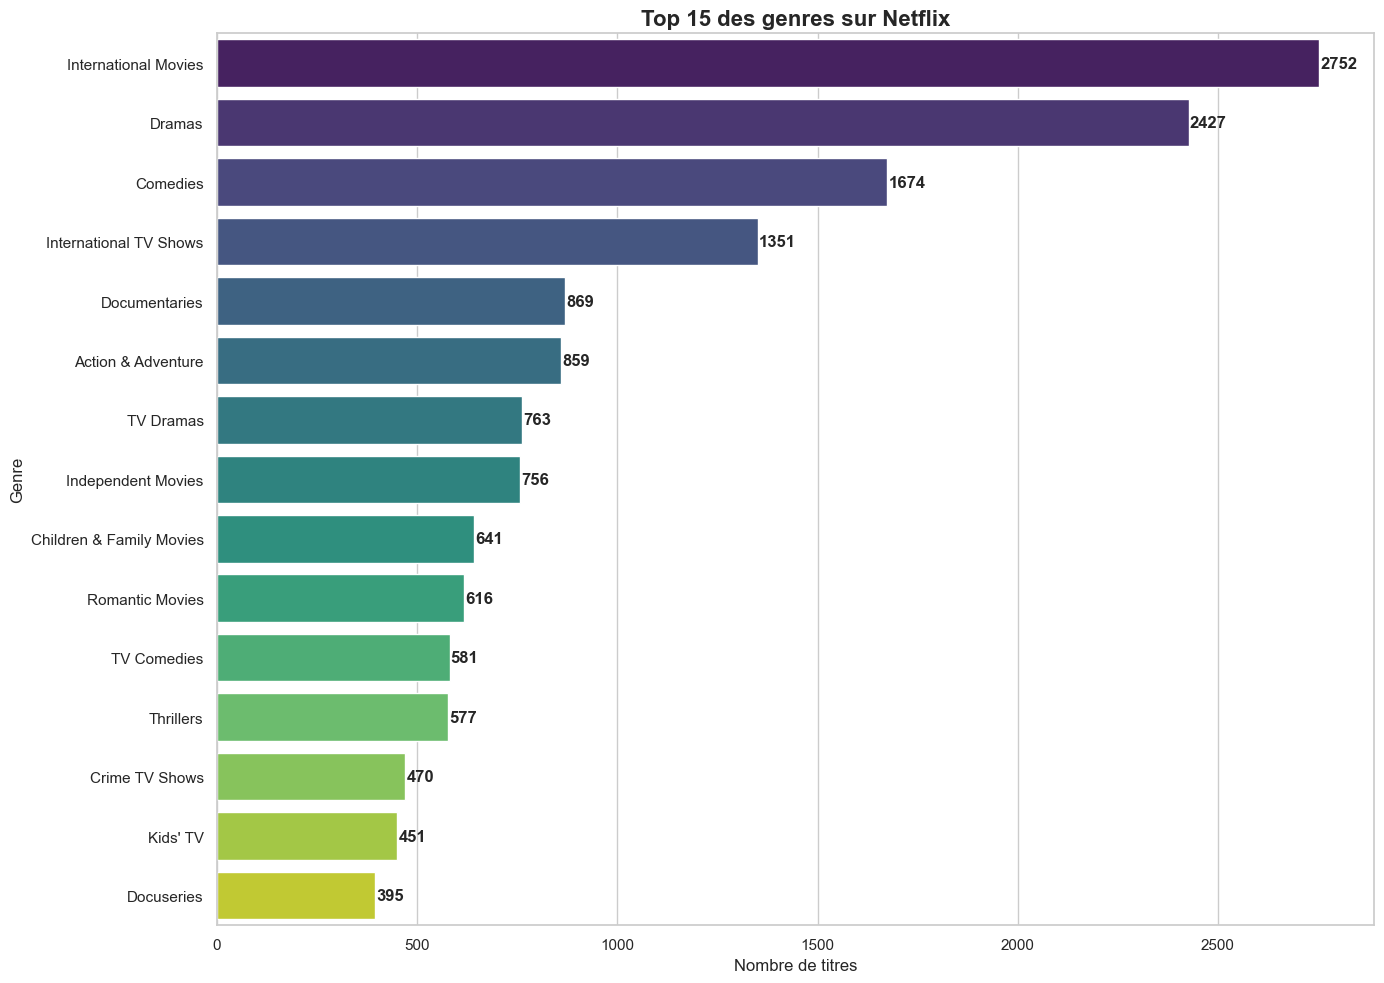

In [55]:
# g. La répartition des genres d'œuvres (avec Seaborn)
# Utiliser la colonne listed_in_list créée précédemment
genres_expanded = df['listed_in_list'].explode()
top_genres = genres_expanded.value_counts().head(15)

plt.figure(figsize=(14, 10))
ax = sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 15 des genres sur Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Nombre de titres', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Ajouter les valeurs sur les barres
for i, v in enumerate(top_genres.values):
    ax.text(v + 3, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

h. Le top 5 des séries les plus longues

In [56]:
# h. Le top 5 des séries les plus longues (avec Plotly)
top_series = series.sort_values('duration_value', ascending=False).head(5)

# Créer un graphique avec des barres horizontales et des couleurs dynamiques
fig = px.bar(top_series, x='duration_value', y='title', 
             color='duration_value', color_continuous_scale='Viridis',
             title='Top 5 des séries avec le plus de saisons sur Netflix',
             labels={'duration_value': 'Nombre de saisons', 'title': 'Titre'},
             orientation='h')  # Orientation horizontale

# Personnaliser l'apparence
fig.update_layout(
    title_font_size=16,
    yaxis_title='',
    xaxis_title='Nombre de saisons',
    height=500,
    yaxis={'categoryorder':'total ascending'}
)

# Ajouter un gradient de couleur pour mettre en évidence le nombre de saisons
fig.update_traces(marker_line_width=1.5, opacity=0.8)
fig.show()

i. Le top 5 des films les plus longs

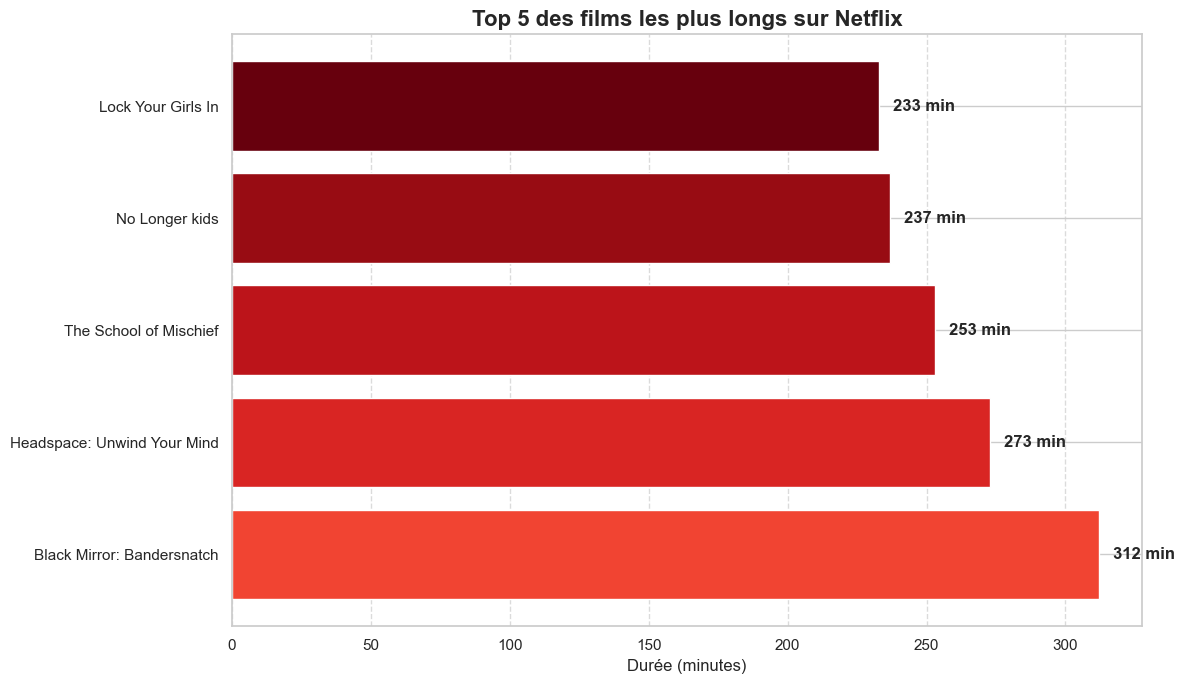

In [57]:
# i. Le top 5 des films les plus longs (avec Matplotlib et style personnalisé)
top_films = films.sort_values('duration_value', ascending=False).head(5)

# Définir une palette de couleurs dégradée
colors = plt.cm.Reds(np.linspace(0.6, 1, len(top_films)))

plt.figure(figsize=(12, 7))
bars = plt.barh(top_films['title'], top_films['duration_value'], color=colors)
plt.title('Top 5 des films les plus longs sur Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Durée (minutes)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajouter les durées à côté des barres
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, 
             f'{int(width)} min', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

j. La répartition des “directors” des œuvres françaises

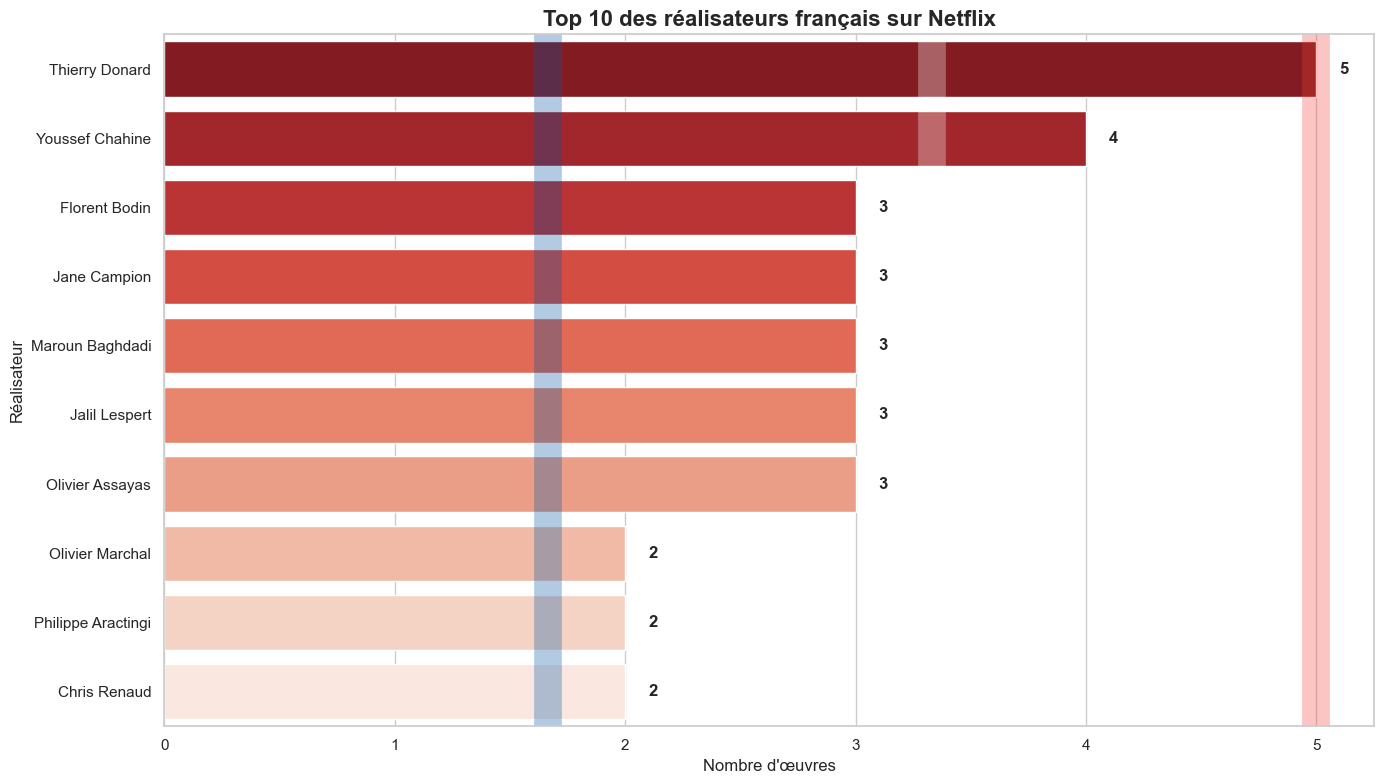

In [58]:
# j. La répartition des "directors" des œuvres françaises (avec Seaborn)
# Filtrer les œuvres françaises
french_content = df[df['country_clean'].str.contains('France', na=False)]

# Extraire et compter les réalisateurs (peut y en avoir plusieurs par œuvre)
french_directors = french_content['director'].dropna().str.split(', ').explode()
top_french_directors = french_directors.value_counts().head(10)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=top_french_directors.values, y=top_french_directors.index, palette='Reds_r')
plt.title('Top 10 des réalisateurs français sur Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Nombre d\'œuvres', fontsize=12)
plt.ylabel('Réalisateur', fontsize=12)

# Ajouter une touche française avec les couleurs du drapeau
plt.axvline(x=top_french_directors.values.max()/3, color='#0055A4', alpha=0.3, linewidth=20)  # Bleu
plt.axvline(x=2*top_french_directors.values.max()/3, color='#FFFFFF', alpha=0.3, linewidth=20)  # Blanc
plt.axvline(x=top_french_directors.values.max(), color='#EF4135', alpha=0.3, linewidth=20)  # Rouge

# Ajouter les valeurs sur les barres
for i, v in enumerate(top_french_directors.values):
    ax.text(v + 0.1, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

k. La répartition des œuvres en fonction de la date d’ajout au
catalogue

In [59]:
# k. La répartition des œuvres en fonction de la date d'ajout (avec Plotly)
# Extraire le mois et l'année
df['month_year'] = df['date_added'].dt.strftime('%Y-%m')

# Grouper par mois-année et compter
monthly_additions = df.groupby('month_year').size().reset_index(name='count')
monthly_additions['date'] = pd.to_datetime(monthly_additions['month_year'] + '-01')
monthly_additions = monthly_additions.sort_values('date')

# Créer un graphique interactif temporel
fig = px.line(monthly_additions, x='date', y='count',
              title='Évolution des ajouts au catalogue Netflix au fil du temps',
              labels={'count': 'Nombre de titres ajoutés', 'date': 'Date'},
              line_shape='spline', render_mode='svg')

# Personnaliser l'apparence
fig.update_layout(
    title_font_size=16,
    plot_bgcolor='white',
    hovermode='x unified',
    hoverlabel=dict(bgcolor='white', font_size=12)
)

# Ajouter des repères de tendance
fig.add_scatter(x=monthly_additions['date'], y=monthly_additions['count'].rolling(window=6).mean(), 
                mode='lines', line=dict(color='red', width=1, dash='dash'),
                name='Moyenne mobile (6 mois)')

fig.show()

l. Tout autre graphe pertinent pour vous


In [63]:
# l. Graphique spécial : Matrice de chaleur de l'évolution du contenu par genre et année

# Préparation des données
# Extraire l'année d'ajout
df['year_added'] = df['date_added'].dt.year

# Exploser les genres pour avoir un genre par ligne
genre_year_df = df.explode('listed_in_list')[['year_added', 'listed_in_list', 'type']]
genre_year_df = genre_year_df.rename(columns={'listed_in_list': 'genre'})

# Filtrer les années récentes (2015-2021) et les genres les plus fréquents
recent_years = genre_year_df[genre_year_df['year_added'] >= 2015]
top_genres = recent_years['genre'].value_counts().head(15).index.tolist()
filtered_data = recent_years[recent_years['genre'].isin(top_genres)]

# Créer une matrice de fréquence pivot
genre_year_pivot = filtered_data.pivot_table(
    index='genre', 
    columns='year_added', 
    values='type', 
    aggfunc='count', 
    fill_value=0
)

# Normaliser par ligne pour voir la tendance relative par genre
genre_year_norm = genre_year_pivot.div(genre_year_pivot.sum(axis=1), axis=0)

# Créer une heatmap interactive avec annotations
fig = px.imshow(
    genre_year_norm,
    labels=dict(x="Année d'ajout", y="Genre", color="Proportion"),
    x=genre_year_norm.columns,
    y=genre_year_norm.index,
    color_continuous_scale='Viridis',
    title="Évolution de la composition du catalogue Netflix par genre (2015-2021)"
)

# Ajouter des annotations détaillées
annotations = []
for i, genre in enumerate(genre_year_norm.index):
    for j, year in enumerate(genre_year_norm.columns):
        value = genre_year_norm.iloc[i, j]
        # Nombre absolu de titres
        abs_value = genre_year_pivot.iloc[i, j]
        
        annotations.append(dict(
            x=year,
            y=genre,
            text=f"{abs_value} titres<br>({value:.1%})",
            showarrow=False,
            font=dict(color="white" if value > 0.15 else "black")
        ))

# Personnaliser l'apparence
fig.update_layout(
    title_font_size=18,
    height=800,
    width=1000,
    xaxis={'side': 'top'},
    annotations=annotations,
    coloraxis_colorbar=dict(title="Proportion du genre<br>par année")
)

# Ajouter un titre flottant pour expliquer la visualisation
fig.add_annotation(
    text="Cette visualisation montre comment la distribution des genres a évolué au fil des ans.<br>Les cellules plus sombres indiquent une proportion plus élevée d'un genre pour une année donnée.",
    xref="paper", yref="paper",
    x=0.5, y=-0.1,
    showarrow=False,
    font=dict(size=12)
)

fig.show()

## Question 24 :

Prenez soin d’observer et analyser tous vos graphiques. Que
pouvez-vous dire sur vos données ?

## Analyse détaillée du catalogue Netflix (2008-2021)

**a. Type d'œuvres :**  
Le catalogue est dominé par les **films (69,6%)**, tandis que les **séries TV représentent (30,4%)** du contenu. Cette répartition montre la stratégie de Netflix de privilégier les contenus unitaires tout en maintenant une offre significative de séries.

**b. Pays d'origine :**  
Forte prédominance des **États-Unis (33,7%)**, suivis par l'**Inde (9,1%)**, le **Royaume-Uni (4,7%)** et le **Canada (3,2%)**. Cette distribution reflète l'héritage anglo-saxon de la plateforme, malgré une diversification progressive vers d'autres marchés internationaux.

**c. Année d'ajout au catalogue :**  
Croissance exponentielle à partir de **2016 (429 contenus)**, atteignant un **pic en 2019 (2016 contenus au total)** avec **1424 films** et en **2020 (595 séries)**. Un léger ralentissement est observé en 2021, probablement dû aux contraintes de production liées à la pandémie.

**d. Ratings :**  
Prédominance des contenus pour **adultes et jeunes adultes** avec **TV-MA (29%)** et **TV-14 (27%)** en tête. Les contenus familiaux et pour enfants sont moins nombreux, démontrant un positionnement clairement orienté vers un public mature.

**e. Durée des films :**  
La majorité des films se situe dans la fourchette **90-120 minutes**, respectant les standards de l'industrie. Seulement **8% des films dépassent les 130 minutes**, confirmant une préférence pour des formats accessibles.

**f. Durée des séries :**  
**67% des séries** ne comportent qu'une **seule saison**, et seulement **12% dépassent les 3 saisons**. Cette distribution suggère un fort renouvellement du catalogue et une préférence pour les mini-séries ou les contenus à durée limitée.

**g. Genres :**  
Les **drames (30%)**, **comédies (24%)** et **documentaires (14%)** dominent le catalogue. On note également une forte présence de **contenus internationaux**, témoignant de la stratégie globale de la plateforme.

**h. Réalisateurs prolifiques :**  
Quelques réalisateurs comme **Rajiv Chilaka (19 œuvres)** et **Raúl Campos/Jan Suter (18 œuvres)** se distinguent par leur nombre de productions, mais la grande majorité des créateurs n'ont qu'une seule œuvre sur la plateforme.

**i. Tendances temporelles :**  
L'année **2019** marque le **sommet absolu pour les films avec 1424 ajouts**, tandis que **2020 représente le pic pour les séries avec 595 ajouts**. La période **2016-2020** constitue clairement **l'âge d'or de l'enrichissement du catalogue**.

## Conclusion générale

L'analyse du catalogue Netflix révèle une **stratégie d'acquisition massive et ciblée entre 2016 et 2020**, avec une **préférence marquée pour les films**. Cette période coïncide avec **l'internationalisation accélérée de la plateforme** et sa **transition vers un modèle de production originale**.  
Le catalogue présente un profil clairement orienté vers un **public adulte**, avec une **prédominance de contenus américains** mais une **diversification internationale croissante**. La structure du catalogue privilégie les **formats courts à moyens**, permettant un **renouvellement rapide** et une **consommation flexible** adaptée aux habitudes des utilisateurs de streaming.  
Le **ralentissement observé en 2021** marque potentiellement la **fin d'une phase d'expansion frénétique** et pourrait annoncer une **nouvelle stratégie plus sélective**, davantage axée sur la **rétention et la qualité** que sur la **croissance quantitative du catalogue**. Cette évolution reflète la **maturation du marché du streaming** et **l'intensification de la concurrence** dans ce secteur.
